# Walmart Sales Projection
1. Show data cleaning and preparation steps

2. Perform EDA on the given dataset and list out findings

3. Predict the sales projection with different algorithms - Use R square and RSME as a metric and provide best possible accuracy from simple regression. 

4. Evaluate both internal and macro factors impact on the accuracy of walmart sales projection: customerized regression model which is similar to ARIMA model.    

In [4]:
# Importing neccessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

import seaborn as sns
import os
from scipy import stats
%matplotlib inline
import datetime

os.getcwd()

'/content'

## 1. Data Cleaning and preparation steps

In [0]:
# Load dataset
data_features = pd.read_csv('features.csv')
data_stores = pd.read_csv('stores.csv')
data_training = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [6]:
# frequency of each digits

data_features.head()

,Unnamed: 0,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,2,1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,3,2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,4,3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,5,4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [7]:
data_features.columns.values

array(['Unnamed: 0', 'index', 'Store', 'Date', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], dtype=object)

In [9]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
Unnamed: 0      8190 non-null int64
index           8190 non-null int64
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 895.9+ KB


In [10]:
data_features.isnull().head()

,Unnamed: 0,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,True,True,True,True,True,False,False,False


In [11]:
data_stores.head()

,Unnamed: 0,index,Store,Type,Size
0,1,0,1,A,151315
1,2,1,2,A,202307
2,3,2,3,B,37392
3,4,3,4,A,205863
4,5,4,5,B,34875


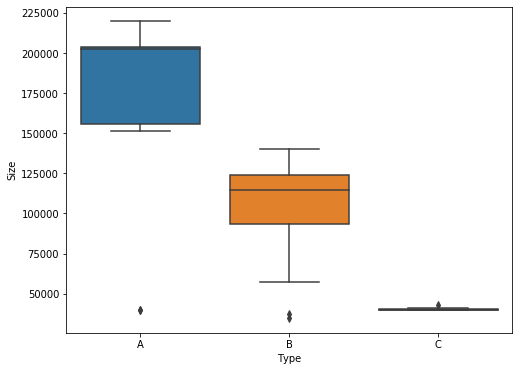

In [12]:
data = pd.concat([data_stores['Type'], data_stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=data)

In [13]:
data_training.head()

,Unnamed: 0,index,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,0.0,1,1,2010-02-05,24924.50,0
1,2,1.0,1,1,2010-02-12,46039.49,1
2,3,2.0,1,1,2010-02-19,41595.55,0
3,4,3.0,1,1,2010-02-26,19403.54,0
4,5,4.0,1,1,2010-03-05,21827.90,0


In [0]:
data_training['Weekly_Sales'] = np.where(data_training['Weekly_Sales'] < 0, 0, data_training['Weekly_Sales'])


In [15]:
data_training.columns

Index(['Unnamed: 0', 'index', 'Store', 'Dept', 'Date', 'Weekly_Sales',
       'IsHoliday'],
      dtype='object')

In [16]:
data_features.isnull().sum()

Unnamed: 0         0
index              0
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [0]:
data_features['WeeklyDate'] = pd.to_datetime(data_features['Date'])

In [0]:
data_features['year'] = pd.to_numeric([my_str.split("-")[0] for my_str in data_features['Date']])
data_features['Months'] = pd.to_numeric([my_str.split("-")[1] for my_str in data_features['Date']])

In [0]:
data_features['Weeks_since_start'] = round(pd.to_numeric((data_features['WeeklyDate'] - pd.to_datetime('2010-02-05')) / np.timedelta64(1, 'W')))
data_features['week_number_of_year'] = data_features['WeeklyDate'].dt.week
data_features['PreWeekDate'] = pd.to_datetime(data_features['Date']) - datetime.timedelta(days = 7)




In [20]:
data_features.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 20 columns):
Unnamed: 0             8190 non-null int64
index                  8190 non-null int64
Store                  8190 non-null int64
Date                   8190 non-null object
Temperature            8190 non-null float64
Fuel_Price             8190 non-null float64
MarkDown1              4032 non-null float64
MarkDown2              2921 non-null float64
MarkDown3              3613 non-null float64
MarkDown4              3464 non-null float64
MarkDown5              4050 non-null float64
CPI                    7605 non-null float64
Unemployment           7605 non-null float64
IsHoliday              8190 non-null int64
WeeklyDate             8190 non-null datetime64[ns]
year                   8190 non-null int64
Months                 8190 non-null int64
Weeks_since_start      8190 non-null float64
week_number_of_year    8190 non-null int64
PreWeekDate            8190 non-null datetime6

In [0]:
data_features['MarkDown1'].fillna(0, inplace=True)
data_features['MarkDown2'].fillna(0, inplace=True)
data_features['MarkDown3'].fillna(0, inplace=True)
data_features['MarkDown4'].fillna(0, inplace=True)
data_features['MarkDown5'].fillna(0, inplace=True)

In [0]:
data_features['CPI'].fillna(data_features['CPI'].mean(), inplace=True)
data_features['Unemployment'].fillna(data_features['Unemployment'].mean(), inplace=True)

In [24]:
data_features.describe()

,Unnamed: 0,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,Months,Weeks_since_start,week_number_of_year
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,4095.500000,4094.500000,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464214,1392.763115,2043.403726,172.460809,7.826821,0.071429,2011.351648,6.291209,90.500000,25.214286
std,2364.393685,2364.393685,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953687,4707.111488,9431.223229,38.292648,1.808963,0.257555,1.041762,3.328046,52.541289,14.527604
min,1.000000,0.000000,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,0.000000,2010.000000,1.000000,0.000000,1.000000
25%,2048.250000,2047.250000,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653800,6.833000,0.000000,2010.000000,3.000000,45.000000,13.000000
50%,4095.500000,4094.500000,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.460809,7.826821,0.000000,2011.000000,6.000000,90.500000,24.000000
75%,6142.750000,6141.750000,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000,0.000000,2012.000000,9.000000,136.000000,37.000000
max,8190.000000,8189.000000,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000,2013.000000,12.000000,181.000000,52.000000


In [26]:
data_features.isnull().sum()

Unnamed: 0             0
index                  0
Store                  0
Date                   0
Temperature            0
Fuel_Price             0
MarkDown1              0
MarkDown2              0
MarkDown3              0
MarkDown4              0
MarkDown5              0
CPI                    0
Unemployment           0
IsHoliday              0
WeeklyDate             0
year                   0
Months                 0
Weeks_since_start      0
week_number_of_year    0
PreWeekDate            0
dtype: int64

In [27]:
data_stores.head()

,Unnamed: 0,index,Store,Type,Size
0,1,0,1,A,151315
1,2,1,2,A,202307
2,3,2,3,B,37392
3,4,3,4,A,205863
4,5,4,5,B,34875


In [0]:
#storetype_dummies = pd.get_dummies(data_stores['Type'], prefix= "Type:")
#store_dummies = pd.get_dummies(data_stores['Store'], prefix= "Store#:")


In [0]:
#data_stores_withDummies = pd.concat([data_stores, storetype_dummies, store_dummies], axis = 1)

In [0]:
#data_stores_withDummies.head()

In [0]:
merge1 = pd.merge(data_features, data_stores, how = 'left', on = 'Store',left_index=True, right_index=False)


In [29]:
merge1.columns

Index(['Unnamed: 0_x', 'index_x', 'Store', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'WeeklyDate', 'year', 'Months',
       'Weeks_since_start', 'week_number_of_year', 'PreWeekDate',
       'Unnamed: 0_y', 'index_y', 'Type', 'Size'],
      dtype='object')

In [30]:
merge1.head()

,Unnamed: 0_x,index_x,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Unnamed: 0_y,index_y,Type,Size
0,1,0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,1,0,A,151315
0,2,1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,1,0,A,151315
0,3,2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,1,0,A,151315
0,4,3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,1,0,A,151315
0,5,4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,1,0,A,151315


In [0]:
merge1 = merge1.drop([merge1.columns[0], merge1.columns[1], merge1.columns[-3], merge1.columns[-4]], axis = 'columns')


In [32]:
merge1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,Months,Weeks_since_start,week_number_of_year,Size
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464214,1392.763115,2043.403726,172.460809,7.826821,0.071429,2011.351648,6.291209,90.500000,25.214286,130287.600000
std,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953687,4707.111488,9431.223229,38.292648,1.808963,0.257555,1.041762,3.328046,52.541289,14.527604,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,0.000000,2010.000000,1.000000,0.000000,1.000000,34875.000000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653800,6.833000,0.000000,2010.000000,3.000000,45.000000,13.000000,70713.000000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.460809,7.826821,0.000000,2011.000000,6.000000,90.500000,24.000000,126512.000000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000,0.000000,2012.000000,9.000000,136.000000,37.000000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000,2013.000000,12.000000,181.000000,52.000000,219622.000000


In [0]:
merge2 = pd.merge(data_training, merge1, how = 'left', on = ['Store', 'Date'])
test_merge2 = pd.merge(data_test, merge1, how = 'left', on = ['Store', 'Date'])


In [50]:
merge2.head()

,index,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Type,Size
0,0.0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,A,151315
1,1.0,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,A,151315
2,2.0,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,A,151315
3,3.0,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,A,151315
4,4.0,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,A,151315


In [0]:
merge2 = merge2.drop([merge2.columns[0]], axis = 'columns')
#test_merge2 = merge2.drop([test_merge2.columns[0]], axis = 'columns')

In [52]:
#merge2 = merge2.drop([merge2.columns[0]], axis = 'columns')
test_merge2 = test_merge2.drop([test_merge2.columns[0]], axis = 'columns')
merge2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,A,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,A,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,A,151315


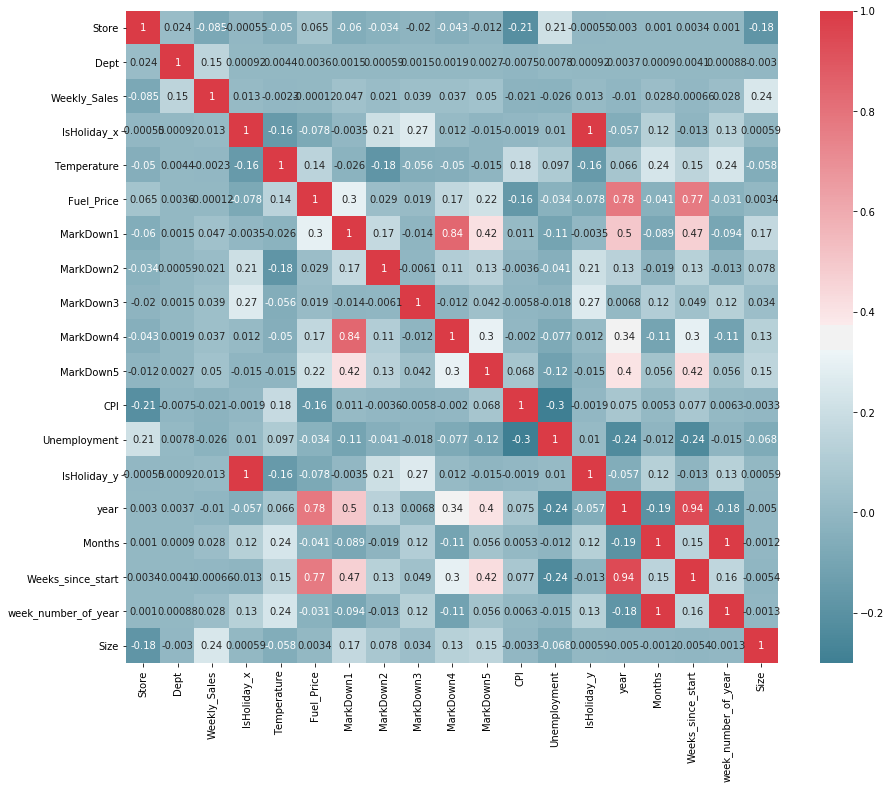

In [53]:
f, ax = plt.subplots(figsize=(15, 12))
corr = merge2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, ax=ax)

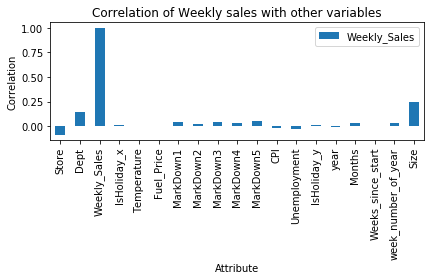

In [54]:
df_corr = corr
ax=df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

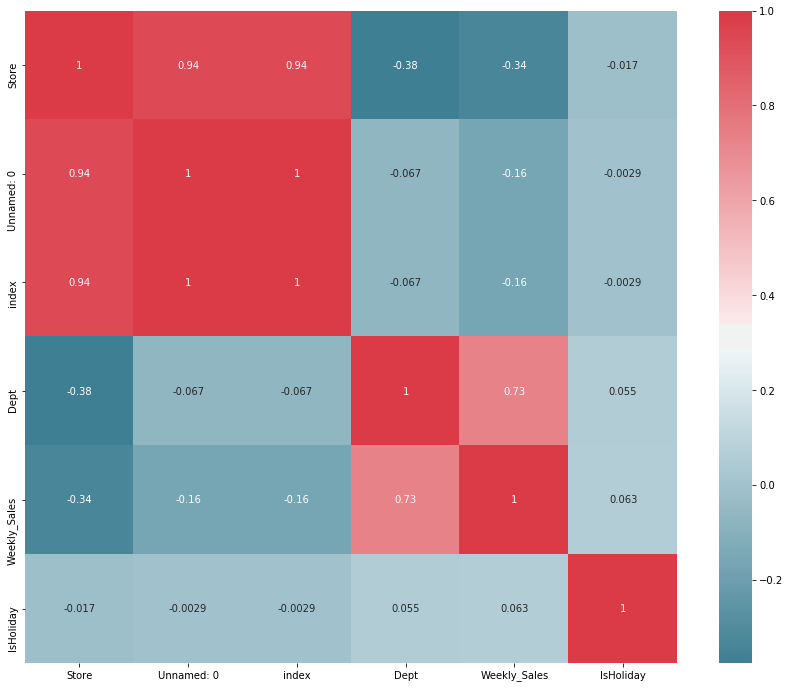

In [55]:
WeeklySales_Store = data_training.groupby(['Date', 'Store'],axis = 0).sum().reset_index()
#WeeklySales_Store = WeeklySales_Store[['Date', 'Weekly_Sales','WeekSales_Change']]
f, ax = plt.subplots(figsize=(15, 12))
corr = WeeklySales_Store.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, ax=ax)

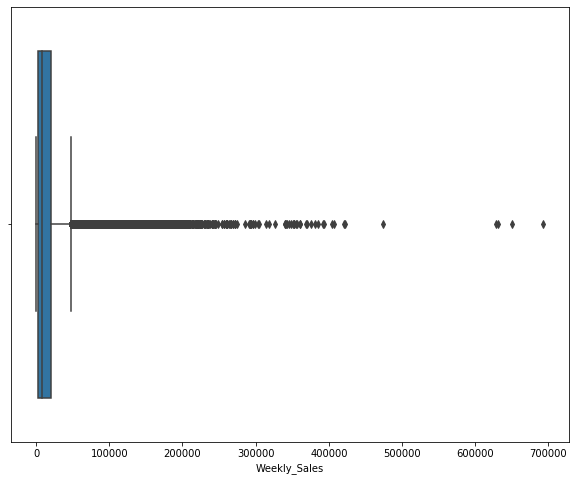

In [56]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=merge2['Weekly_Sales'],ax=ax)

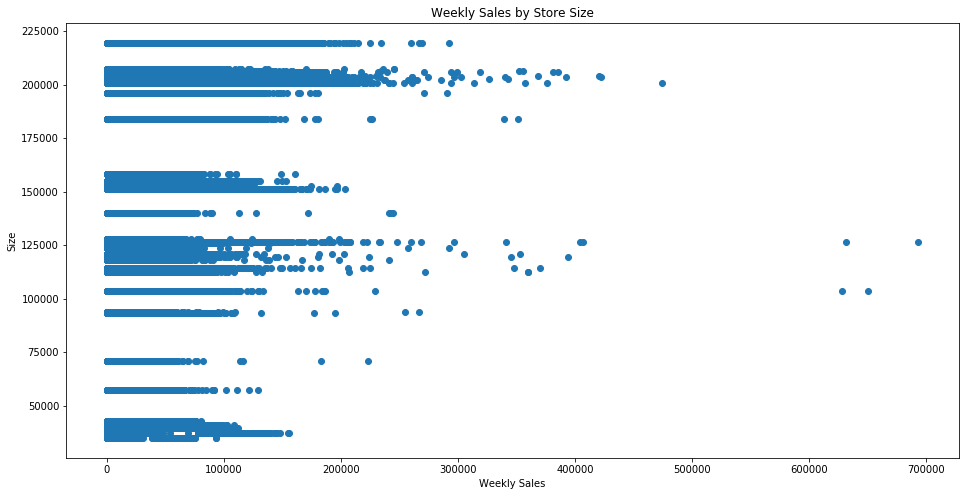

In [57]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(merge2['Weekly_Sales'], merge2['Size'])
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Size')
ax.set_title('Weekly Sales by Store Size')
plt.show()

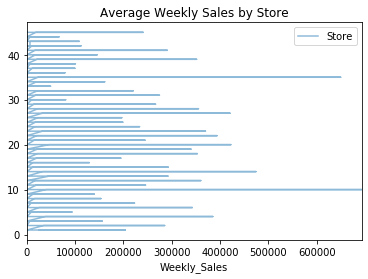

In [58]:
merge2.plot(kind='line', x='Weekly_Sales', y='Store', title = 'Average Weekly Sales by Store', alpha=0.5)


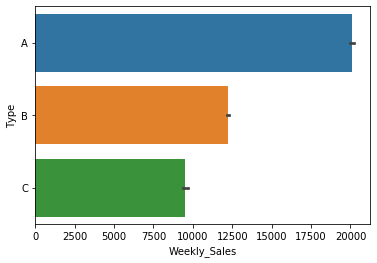

In [59]:
sns.barplot(x=merge2["Weekly_Sales"],y=merge2["Type"])


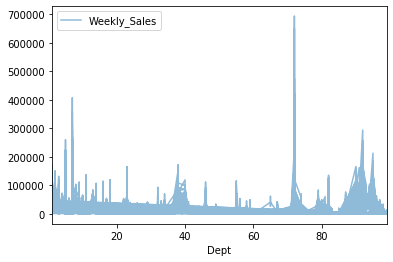

In [60]:
merge2.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

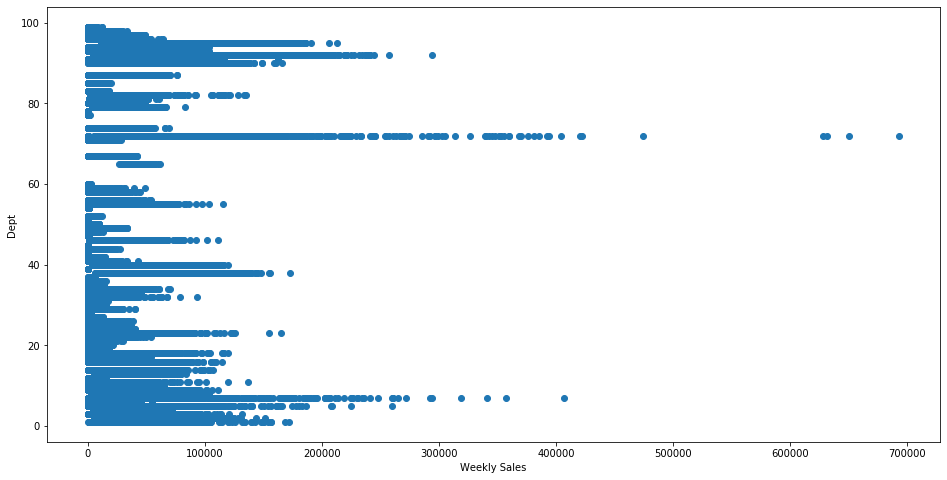

In [61]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(merge2['Weekly_Sales'], merge2['Dept'])
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Dept')
plt.show()

In [62]:
merge2['WeeklyDate'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: WeeklyDate, dtype: datetime64[ns]

In [0]:
merge2_test = merge2

In [0]:
merge2_test['1wLag'] = merge2['Weekly_Sales'].shift(1)
merge2_test['2wLag'] = merge2['Weekly_Sales'].shift(2)
merge2_test['3wLag'] = merge2['Weekly_Sales'].shift(3)
merge2_test['4wLag'] = merge2['Weekly_Sales'].shift(4)
merge2_test.fillna(0).head()
merge2_test[['Weekly_Sales','1wLag', '2wLag','3wLag','4wLag']].corr()

,Weekly_Sales,1wLag,2wLag,3wLag,4wLag
Weekly_Sales,1.000000,0.945139,0.928423,0.917218,0.917432
1wLag,0.945139,1.000000,0.945139,0.928423,0.917218
2wLag,0.928423,0.945139,1.000000,0.945139,0.928423
3wLag,0.917218,0.928423,0.945139,1.000000,0.945139
4wLag,0.917432,0.917218,0.928423,0.945139,1.000000


In [0]:
ax= sns.barplot(x="Store", y="Weekly_Sales",  data=master_df_new_var)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [0]:
Merge_train = merge2


# 2. Feature Engineering

Based on the merged data, we start to doing feature engineering such as having previous weekly sales, weekly sales change, recoding holidays due to high spike of sales during week of Thanksgiving and pre-chrismas. 

In [0]:
Merge_train['PreWeekSales'] = Merge_train['Weekly_Sales'].shift(1)
Merge_train['PreWeekSales'] = np.where(Merge_train['WeeklyDate'] == pd.to_datetime('2010-02-05'), 0, Merge_train['PreWeekSales'])

In [67]:
Merge_train['WeekSales_Change'] = Merge_train['Weekly_Sales'] - Merge_train['PreWeekSales'] 
Merge_train['WeekSales_Change'][Merge_train['Date'] == '2010-02-05'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
Merge_train['Date'][Merge_train['Date'] == '2010-02-05'].count()

2955

In [0]:
ts_WeeklySales = Merge_train.groupby('Date')['Weekly_Sales', 'WeekSales_Change'].sum().reset_index()

In [72]:
ts = ts_WeeklySales.set_index('Date')
ts.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

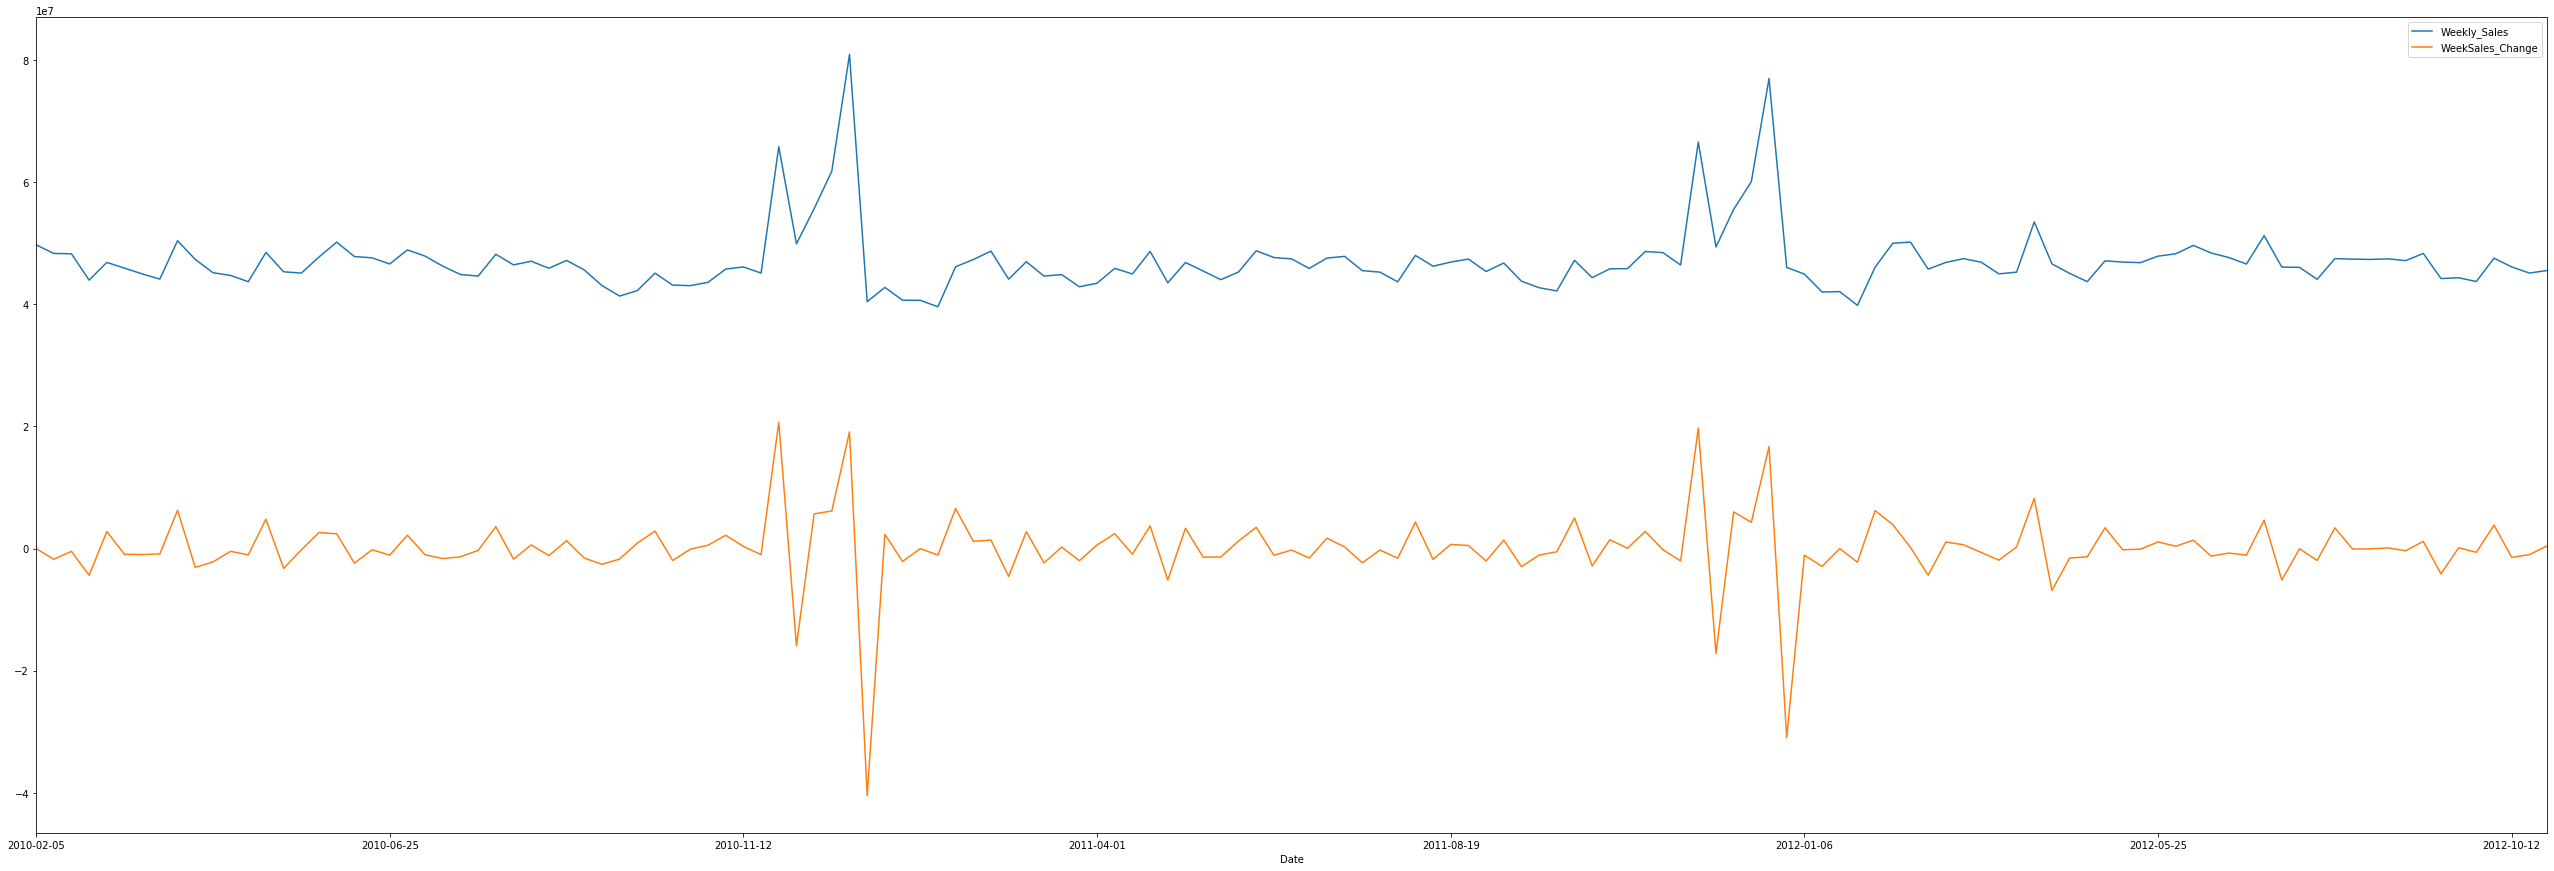

In [73]:
ts.plot(figsize=(45,15))

Text(0, 0.5, 'Sales($)')

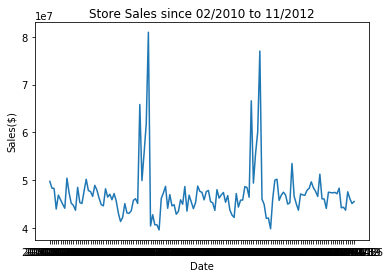

In [74]:
plt.plot(ts_WeeklySales['Date'], ts_WeeklySales['Weekly_Sales'])
plt.title('Store Sales since 02/2010 to 11/2012')
plt.xlabel('Date')
plt.ylabel('Sales($)')

Text(0, 0.5, 'Weekly Sales Change($)')

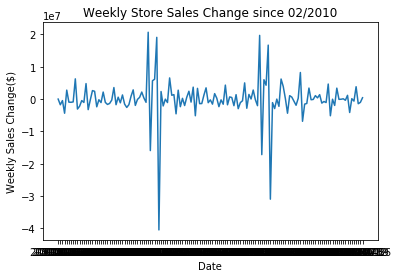

In [75]:
plt.plot(ts_WeeklySales['Date'], ts_WeeklySales['WeekSales_Change'])
plt.title('Weekly Store Sales Change since 02/2010')
plt.xlabel('Date')
plt.ylabel('Weekly Sales Change($)')

# 3. Perform EDA on the given dataset and list out findings
1. Rolling mean and variance of store sales assue us that assumption homoskedastic after the engineering of new holiday features
2. Trend and seasonality of the salses data
3. Differencing or adding previous week's sales to remove seasonabiltiy/trend. 
4. Heat map of features to get an intuitive understanding of the Sales




In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,dftest)

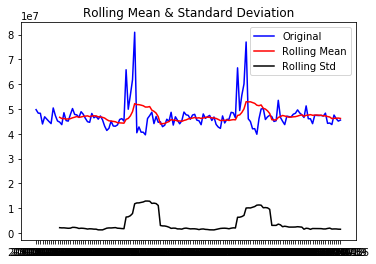

Results of Dickey-Fuller Test:
Test Statistic                -5.908398e+00
p-value                        2.674606e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.908397742025459, 2.674606455613498e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.455595333788)


In [77]:
test_stationarity(ts['Weekly_Sales'])


In [0]:
#ts_NohighJumps = ts_WeeklySales[ts_WeeklySales['Weekly_Sales']< 6e7])
#[WeeklySales_Store['Weekly_Sales'] > 6e7 ]
WSales_highJumps = ts_WeeklySales[ts_WeeklySales['Weekly_Sales'] > 6e7 ]
DropSpike_WSales = ts_WeeklySales.drop(WSales_highJumps.index)

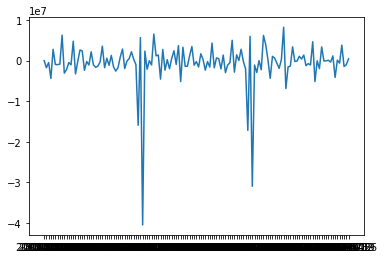

In [80]:
plt.plot(DropSpike_WSales['Date'], DropSpike_WSales['WeekSales_Change'])

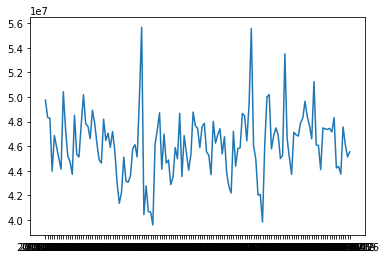

In [81]:
plt.plot(DropSpike_WSales['Date'], DropSpike_WSales['Weekly_Sales'])

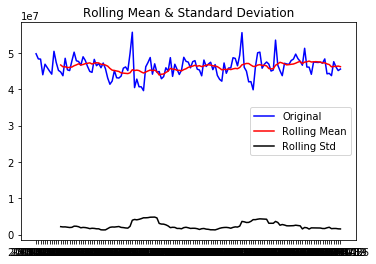

Results of Dickey-Fuller Test:
Test Statistic                  -1.996977
p-value                          0.287900
#Lags Used                      12.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64 (-1.9969769215594655, 0.28790018484602686, 12, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, 3970.3523369885725)


In [82]:
#DropSpike_WSales.drop([DropSpike_WSales['WeekSales_Change']], axis = 'columns') 
ts_NoSpike = DropSpike_WSales.set_index('Date')

test_stationarity(ts_NoSpike['Weekly_Sales'])

In [83]:
ts_WeeklySales2 = Merge_train.groupby('Date')['Weekly_Sales'].sum().reset_index()
WSales_highJumps2 = ts_WeeklySales2[ts_WeeklySales2['Weekly_Sales'] > 6e7 ]
DropSpike_WSales2 = ts_WeeklySales2.drop(WSales_highJumps.index)
ts = ts_WeeklySales2.set_index('Date')
ts.index



Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

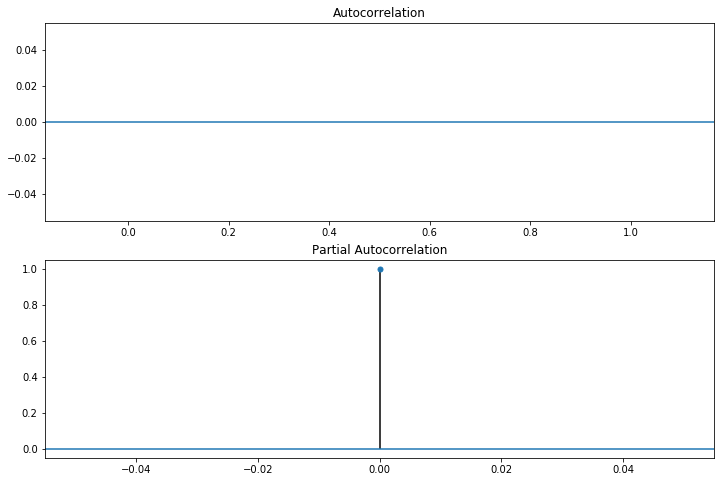

In [84]:
import statsmodels.api as sm
dta= ts_NoSpike.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉

fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(dta['Weekly_Sales'],lags=10,ax=ax1)
fig = sm.graphics.tsa.plot_pacf(dta['Weekly_Sales'],lags=10,ax=ax2)

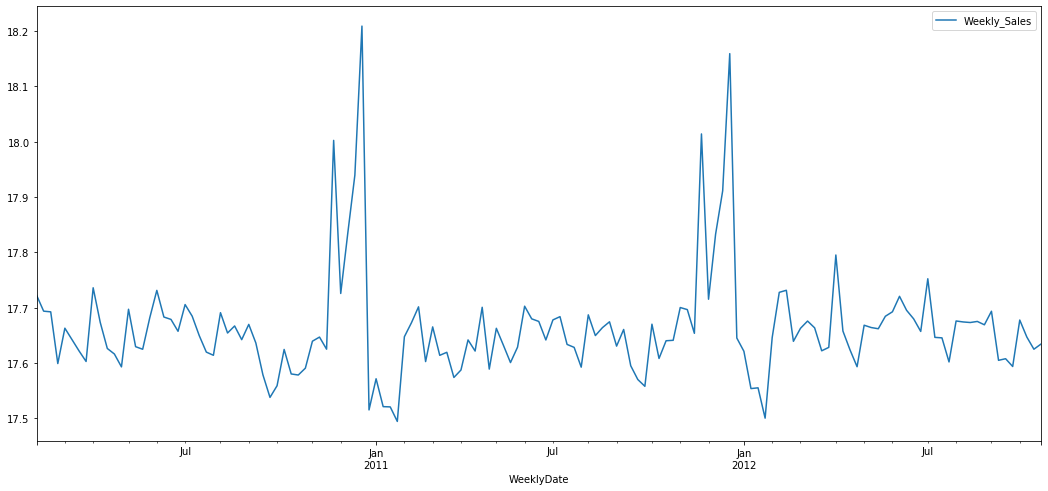

In [0]:
ts_WeeklySales = Merge_train.groupby('WeeklyDate')['Weekly_Sales'].sum().reset_index()
ts = ts_WeeklySales.set_index('WeeklyDate')
ts.index
ts_log = np.log(ts)
ts_log.plot()


#ts.index = pd.DatetimeIndex(ts.index.values,
#                               freq=ts.index.inferred_freq)
#ts_log.index = pd.DatetimeIndex(ts_log.index.values,
#                               freq=ts_log.index.inferred_freq)


In [85]:

from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#rcParams change the bydefault size of figure
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

AttributeError: ignored

In [0]:
import numpy as np
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alphas
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = X
        self.y = y
        self.w = np.zeros((self.n_features, 1))
        self.coef_ = None
        self.intercept_ = None
        self.score = np.zeros(self.n_samples, 1)

    def fit(self, lambda1 = 0, lambda2 = 0):
        # \ gradient decent as our fit method
        # Let use l1_lambda or l2_lambda to perform l1 or l2 regularization
        # if both are provided the regularization will be l1 and l2
        
        
        for i in range(self.n_iter):
            self.w = self.w - (self.alpha/self.n_samples) * \
            (self.X.T @ (self.X @ self.w - self.y ))
                

        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]

        return self
    def accuracy(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            X = X

        if y is None:
            y = self.y
        else:
            y = y

        y_pred = X @ self.w
        score = np.mean(1 - (((y - y_pred)**2).sum(axis=1) / ((y - y.mean(axis=1))**2).sum(axis=1)))

        return score

    def predict(self, X):
        y_hat = X @ self.w
        return y_hat

    def get_w(self):

        return self.w

In [88]:
Merge_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Type,Size,PreWeekSales,WeekSales_Change
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,A,151315,0.00,0.00
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,A,151315,24924.50,21114.99
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,A,151315,46039.49,-4443.94
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,A,151315,41595.55,-22192.01
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,A,151315,19403.54,2424.36


In [90]:
merge_training_backup = Merge_train

storetype_dummies = pd.get_dummies(Merge_train['Type'], prefix= "Type:")

store_dummies = pd.get_dummies(Merge_train['Store'], prefix= "Store#:")

Merge_train['NewHoliday_Ind'] = np.where((Merge_train['IsHoliday_x'] == 0), 0, 1)
Merge_train['NewHoliday_Ind'][Merge_train['Date'].isin(['2010-11-26', '2011-12-25', '2010-12-24', '2011-12-23'])] = 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
storetype_dummies_2 = pd.get_dummies(test_merge2['Type'], prefix= "Type:")

store_dummies_2 = pd.get_dummies(test_merge2['Store'], prefix= "Store#:")

test_merge2['NewHoliday_Ind'] = np.where((test_merge2['IsHoliday_x'] == 0), 0, 1)
test_merge2['NewHoliday_Ind'][test_merge2['Date'].isin(['2012-11-26', '2012-12-25', '2012-12-24', '2012-12-23'])] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#storetype_dummies = pd.get_dummies(data_stores['Type'], prefix= "Type:")
#store_dummies = pd.get_dummies(data_stores['Store'], prefix= "Store#:")
#, store_dummies
data_train_withDummies = pd.concat([Merge_train, storetype_dummies,  store_dummies], axis = 1)
test_merge2_withDummies = pd.concat([test_merge2, storetype_dummies_2, store_dummies_2], axis = 1)


In [0]:
merge_train_backup = Merge_train

In [96]:
data_train_withDummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Type,Size,PreWeekSales,WeekSales_Change,NewHoliday_Ind,Type:_A,Type:_B,Type:_C,Store#:_1,Store#:_2,Store#:_3,Store#:_4,Store#:_5,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,Store#:_23,Store#:_24,Store#:_25,Store#:_26,Store#:_27,Store#:_28,Store#:_29,Store#:_30,Store#:_31,Store#:_32,Store#:_33,Store#:_34,Store#:_35,Store#:_36,Store#:_37,Store#:_38,Store#:_39,Store#:_40,Store#:_41,Store#:_42,Store#:_43,Store#:_44,Store#:_45
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,A,151315,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,A,151315,24924.50,21114.99,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,A,151315,46039.49,-4443.94,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,A,151315,41595.55,-22192.01,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,A,151315,19403.54,2424.36,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
data_train_withDummies.info()
test_merge2_withDummies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 74 columns):
Store                  421570 non-null int64
Dept                   421570 non-null int64
Date                   421570 non-null object
Weekly_Sales           421570 non-null float64
IsHoliday_x            421570 non-null int64
Temperature            421570 non-null float64
Fuel_Price             421570 non-null float64
MarkDown1              421570 non-null float64
MarkDown2              421570 non-null float64
MarkDown3              421570 non-null float64
MarkDown4              421570 non-null float64
MarkDown5              421570 non-null float64
CPI                    421570 non-null float64
Unemployment           421570 non-null float64
IsHoliday_y            421570 non-null int64
WeeklyDate             421570 non-null datetime64[ns]
year                   421570 non-null int64
Months                 421570 non-null int64
Weeks_since_start      421570 non-null float64
we

,index,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Type,Size,NewHoliday_Ind,Type:_A,Type:_B,Type:_C,Store#:_1,Store#:_2,Store#:_3,Store#:_4,Store#:_5,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,Store#:_23,Store#:_24,Store#:_25,Store#:_26,Store#:_27,Store#:_28,Store#:_29,Store#:_30,Store#:_31,Store#:_32,Store#:_33,Store#:_34,Store#:_35,Store#:_36,Store#:_37,Store#:_38,Store#:_39,Store#:_40,Store#:_41,Store#:_42,Store#:_43,Store#:_44,Store#:_45
0,0.0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,2012-11-02,2012,11,143.0,44,2012-10-26,A,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,2012-11-09,2012,11,144.0,45,2012-11-02,A,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,2012-11-16,2012,11,145.0,46,2012-11-09,A,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,2012-11-23,2012,11,146.0,47,2012-11-16,A,151315,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,2012-11-30,2012,11,147.0,48,2012-11-23,A,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#data_train_withDummies.drop([data_train_withDummies['IsHoliday_x'], data_train_withDummies['PreWeekDate']],axis = 'columns')

data_train_withDummies = data_train_withDummies.drop([data_train_withDummies['IsHoliday_x'], data_train_withDummies['WeeklyDate'] , 
 
                            data_train_withDummies['PreWeekDate'], data_train_withDummies['WeeklyDate']], axis = 'columns')



In [113]:

test_merge2_withDummies.head()

,index,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Size,NewHoliday_Ind,Type:_A,Type:_B,Type:_C,Store#:_1,Store#:_2,Store#:_3,Store#:_4,Store#:_5,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,Store#:_23,Store#:_24,Store#:_25,Store#:_26,Store#:_27,Store#:_28,Store#:_29,Store#:_30,Store#:_31,Store#:_32,Store#:_33,Store#:_34,Store#:_35,Store#:_36,Store#:_37,Store#:_38,Store#:_39,Store#:_40,Store#:_41,Store#:_42,Store#:_43,Store#:_44,Store#:_45
0,0.0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,2012-11-02,2012,11,143.0,44,2012-10-26,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,2012-11-09,2012,11,144.0,45,2012-11-02,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,2012-11-16,2012,11,145.0,46,2012-11-09,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,2012-11-23,2012,11,146.0,47,2012-11-16,151315,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,2012-11-30,2012,11,147.0,48,2012-11-23,151315,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
test_merge2_withDummies = test_merge2_withDummies.drop([test_merge2_withDummies['IsHoliday_x'], test_merge2_withDummies['WeeklyDate']], axis = 'columns') #
#                             test_merge2_withDummies['PreWeekDate'], test_merge2_withDummies['WeeklyDate']], axis = 'columns')
#test_merge2_withDummies = test_merge2_withDummies.drop([test_merge2_withDummies['IsHoliday_x'], test_merge2_withDummies['WeeklyDate']], axis = 'columns') #


KeyError: ignored

In [0]:
data_train_withDummies = data_train_withDummies.drop(['Type'], axis = 'columns')


In [0]:
data_train_withDummies = data_train_withDummies.drop(['PreWeekDate'], axis = 'columns')
#data_train_withDummies.info()


In [0]:
data_train_withDummies = data_train_withDummies.drop(['WeeklyDate' ], axis = 'columns')

In [0]:
data_train_withDummies_backup = data_train_withDummies

In [0]:
#test_merge2_withDummies = test_merge2_withDummies.drop(['Type'], aixs = 'columns')
test_merge2_withDummies = test_merge2_withDummies.drop(['Type'], axis = 'columns')


In [0]:

test_merge2_withDummies = test_merge2_withDummies.drop(['PreWeekDate'], axis = 'columns')

#[test_merge2_withDummies['IsHoliday_x'], test_merge2_withDummies['WeeklyDate']], axis = 'columns') #
#                             test_merge2_withDummies['PreWeekDate'], test_merge2_withDummies['WeeklyDate']

In [0]:
test_merge2_withDummies = test_merge2_withDummies.drop(['WeeklyDate'], axis = 'columns')


In [0]:
test_merge2_withDummies = test_merge2_withDummies.drop(['IsHoliday_x'], axis = 'columns')


In [118]:
data_train_withDummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 71 columns):
Store                  421570 non-null int64
Dept                   421570 non-null int64
Date                   421570 non-null object
Weekly_Sales           421570 non-null float64
IsHoliday_x            421570 non-null int64
Temperature            421570 non-null float64
Fuel_Price             421570 non-null float64
MarkDown1              421570 non-null float64
MarkDown2              421570 non-null float64
MarkDown3              421570 non-null float64
MarkDown4              421570 non-null float64
MarkDown5              421570 non-null float64
CPI                    421570 non-null float64
Unemployment           421570 non-null float64
IsHoliday_y            421570 non-null int64
year                   421570 non-null int64
Months                 421570 non-null int64
Weeks_since_start      421570 non-null float64
week_number_of_year    421570 non-null int64
Size       

In [119]:
features_drop=['IsHoliday_x', 'Date', 'index', 'Store', 'WeekSales_Change', 'Weekly_Sales']


train_X= data_train_withDummies.drop(features_drop, axis=1)
train_y=data_train_withDummies['Weekly_Sales'] 

#test=test.drop(features_drop, axis=1)
#train=train.drop(features_drop, axis=1)
#test=test.drop(features_drop, axis=1)

#data_train_withDummies.groupby(by = ['s'])

KeyError: ignored

In [0]:
train_X


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,Months,Weeks_since_start,week_number_of_year,Size,PrevWeekSales,Type:_A,Type:_B,Type:_C,Store#:_1,Store#:_2,Store#:_3,Store#:_4,Store#:_5,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,...,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,Store#:_23,Store#:_24,Store#:_25,Store#:_26,Store#:_27,Store#:_28,Store#:_29,Store#:_30,Store#:_31,Store#:_32,Store#:_33,Store#:_34,Store#:_35,Store#:_36,Store#:_37,Store#:_38,Store#:_39,Store#:_40,Store#:_41,Store#:_42,Store#:_43,Store#:_44,Store#:_45
0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2010,2,0.0,5,151315,0.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,2010,2,1.0,6,151315,1643690.90,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2010,2,2.0,7,151315,1641957.46,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2010,2,3.0,8,151315,1611968.25,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,2010,3,4.0,9,151315,1409727.63,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013600,8.684,2012,9,138.0,39,118221,723086.20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6431,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170400,8.667,2012,10,139.0,40,118221,713173.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6432,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327300,8.667,2012,10,140.0,41,118221,733455.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6433,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330900,8.667,2012,10,141.0,42,118221,734464.36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
data_train_withDummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 72 columns):
Store                  421570 non-null int64
Dept                   421570 non-null int64
Date                   421570 non-null object
Weekly_Sales           421570 non-null float64
IsHoliday_x            421570 non-null int64
Temperature            421570 non-null float64
Fuel_Price             421570 non-null float64
MarkDown1              421570 non-null float64
MarkDown2              421570 non-null float64
MarkDown3              421570 non-null float64
MarkDown4              421570 non-null float64
MarkDown5              421570 non-null float64
CPI                    421570 non-null float64
Unemployment           421570 non-null float64
IsHoliday_y            421570 non-null int64
year                   421570 non-null int64
Months                 421570 non-null int64
Weeks_since_start      421570 non-null float64
week_number_of_year    421570 non-null int64
Type       

# 3. Model Selection
We look at multivariate linear regression algorithms and gradually adding more and more features: trend variable, seasonability and previous weekly sales.
We also found that macro economics and mark downs doesn't add much improvement to our projection.
 
We found that previous week's sales are very informative for next week's sales with a correlation of 93%. 



In [120]:
# linear regression model with store and department seperately

#merge_training_backup = Merge_train
X_train = train_X.to_numpy
y_train = train_y.to_numpy

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_y)
y_hat = regressor.predict(train_X)
print(regressor.score(train_X, train_y))
## Predicting the Test set results
#y_pred = regressor.predict(X_test)
#linearReg = LinearRegression()
# gnb = BernoulliBayes()
#gnb = GuassNB()
#gnb.fit(X,y)
#y_hat = gnb.predict(X)
#print(accuracy(y,y_hat))

NameError: ignored

In [0]:
#sns.heatmap(trains.corr())
plt.scatter(train_y, y_hat)

In [121]:
Merge_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Type,Size,PreWeekSales,WeekSales_Change,NewHoliday_Ind
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,A,151315,0.00,0.00,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,A,151315,24924.50,21114.99,1
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,A,151315,46039.49,-4443.94,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,A,151315,41595.55,-22192.01,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,A,151315,19403.54,2424.36,0


In [0]:
# Weekly_Sales by store model ( adding department together)
data_weeklySales_store= data_training.groupby(['Store','Date'], axis = 0).sum().reset_index()

merge1 = pd.merge(data_features, data_stores, how = 'left', on = 'Store',left_index=False, right_index=False)
merge2 = pd.merge(data_weeklySales_store,merge1, how = 'left', on = ['Store','Date'],left_index=False, right_index=False)
 

# group by Sales data analysis
#WeeklySales_Store= data_training.groupby(['Date'],axis = 0).sum().reset_index()
#WeeklySales_Store = WeeklySales_Store[['Date', 'Weekly_Sales','WeekSales_Change']]

#WeeklySales_Store['WeekSales_Change'][WeeklySales_Store['Date'] == '2010-02-05'] = 0
 

In [123]:
merge2.head()

,Store,Date,Unnamed: 0,index,Dept,Weekly_Sales,IsHoliday_x,Unnamed: 0_x,index_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,Unnamed: 0_y,index_y,Type,Size
0,1,2010-02-05,365201,365128.0,3184,1643690.90,0,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010-02-05,2010,2,0.0,5,2010-01-29,1,0,A,151315
1,1,2010-02-12,359225,359153.0,3137,1641957.46,72,2,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010-02-12,2010,2,1.0,6,2010-02-05,1,0,A,151315
2,1,2010-02-19,365346,365273.0,3184,1612831.25,0,3,2,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010-02-19,2010,2,2.0,7,2010-02-12,1,0,A,151315
3,1,2010-02-26,359369,359297.0,3137,1409727.63,0,4,3,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010-02-26,2010,2,3.0,8,2010-02-19,1,0,A,151315
4,1,2010-03-05,367378,367305.0,3215,1554806.69,0,5,4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010-03-05,2010,3,4.0,9,2010-02-26,1,0,A,151315


In [124]:
merge2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 29 columns):
Store                  6435 non-null int64
Date                   6435 non-null object
Unnamed: 0             6435 non-null int64
index                  6435 non-null float64
Dept                   6435 non-null int64
Weekly_Sales           6435 non-null float64
IsHoliday_x            6435 non-null int64
Unnamed: 0_x           6435 non-null int64
index_x                6435 non-null int64
Temperature            6435 non-null float64
Fuel_Price             6435 non-null float64
MarkDown1              6435 non-null float64
MarkDown2              6435 non-null float64
MarkDown3              6435 non-null float64
MarkDown4              6435 non-null float64
MarkDown5              6435 non-null float64
CPI                    6435 non-null float64
Unemployment           6435 non-null float64
IsHoliday_y            6435 non-null int64
WeeklyDate             6435 non-null datetime64[ns]
y

In [0]:
merge2['PrevWeekSales'] = merge2['Weekly_Sales'].shift(1)
merge2['PrevWeekSales']= np.where(merge2['WeeklyDate'] == pd.to_datetime('2010-02-05'), 0, merge2['PrevWeekSales'])

merge2.drop(merge2.columns[[2,3,4,6,7,8,18,19,24,25,26]], axis = 1,inplace = True)
#drop_features = ['Unnamed: 0', 'Index', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Unnamed: 0_x', 'index_x', 'IsHoliday_y','WeeklyDate','PreWeekDate','Unnamed: 0_y', 'index_y']
drop_features = ['Weekly_Sales','Date']
train_X = merge2.drop(drop_features, axis = 1)
train_y = merge2['Weekly_Sales']



In [126]:
merge2.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,Months,Weeks_since_start,week_number_of_year,Type,Size,PrevWeekSales
0,1,2010-02-05,1643690.90,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,0.0,5,A,151315,0.00
1,1,2010-02-12,1641957.46,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,1.0,6,A,151315,1643690.90
2,1,2010-02-19,1612831.25,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,2.0,7,A,151315,1641957.46
3,1,2010-02-26,1409727.63,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,3.0,8,A,151315,1612831.25
4,1,2010-03-05,1554806.69,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,4.0,9,A,151315,1409727.63


In [128]:
# 2.  linear regression model with store only 
storetype_dummies = pd.get_dummies(merge2['Type'], prefix= "Type:")
store_dummies = pd.get_dummies(merge2['Store'], prefix= "Store#:")

merge2 = pd.concat([merge2, storetype_dummies,  store_dummies], axis = 1)

drop_features = ['Weekly_Sales','Date', 'Store', 'Type']
train_X = merge2.drop(drop_features, axis = 1)
train_y = np.log1p(merge2['Weekly_Sales'])


#merge_training_backup = Merge_train
#X_train = train_X.to_numpy
#y_train = train_y.to_numpy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

regressor = LinearRegression()
regressor.fit(train_X, train_y)
y_hat = regressor.predict(train_X)
print(regressor.score(train_X, train_y)) 
mse = mean_squared_error(train_y, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)




0.9666624796713739
Root_Mean_Squared_Error : 0.10740651882788227


In [0]:
# sensitivities
# test, train split

In [129]:
# get out of trend (simple linear regression to time t or with t2)

data_training.head()
data_training.columns
data_training['WeeklyDate'] = pd.to_datetime(data_training['Date'])
data_training['year'] = pd.to_numeric([my_str.split("-")[0] for my_str in data_training['Date']])
data_training['Months'] = pd.to_numeric([my_str.split("-")[1] for my_str in data_training['Date']])
data_training['Weeks_since_start'] = round(pd.to_numeric((data_training['WeeklyDate'] - pd.to_datetime('2010-02-05')) / np.timedelta64(1, 'W')))
data_training['week_number_of_year'] = data_training['WeeklyDate'].dt.week
data_training['PreWeekDate'] = pd.to_datetime(data_training['Date']) - datetime.timedelta(days = 7)
data_training['NewHoliday_Ind'] = np.where((data_training['IsHoliday'] == 0), 0, 1)
data_training['NewHoliday_Ind'][data_training['Date'].isin(['2010-11-26', '2011-12-25', '2010-12-24', '2011-12-23'])] = 2



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [130]:
data_training.head()

,Unnamed: 0,index,Store,Dept,Date,Weekly_Sales,IsHoliday,WeeklyDate,year,Months,Weeks_since_start,week_number_of_year,PreWeekDate,NewHoliday_Ind
0,1,0.0,1,1,2010-02-05,24924.50,0,2010-02-05,2010,2,0.0,5,2010-01-29,0
1,2,1.0,1,1,2010-02-12,46039.49,1,2010-02-12,2010,2,1.0,6,2010-02-05,1
2,3,2.0,1,1,2010-02-19,41595.55,0,2010-02-19,2010,2,2.0,7,2010-02-12,0
3,4,3.0,1,1,2010-02-26,19403.54,0,2010-02-26,2010,2,3.0,8,2010-02-19,0
4,5,4.0,1,1,2010-03-05,21827.90,0,2010-03-05,2010,3,4.0,9,2010-02-26,0


In [0]:
#merge1 = pd.merge(data_training, data_stores, on )
merge_training_store = pd.merge(data_training, data_stores, how = 'left', on = ['Store'])
#data_training_backup = data_training
#data_test_backup = data_test


In [132]:
merge_training_store.head()
merge_training_store.columns

Index(['Unnamed: 0_x', 'index_x', 'Store', 'Dept', 'Date', 'Weekly_Sales',
       'IsHoliday', 'WeeklyDate', 'year', 'Months', 'Weeks_since_start',
       'week_number_of_year', 'PreWeekDate', 'NewHoliday_Ind', 'Unnamed: 0_y',
       'index_y', 'Type', 'Size'],
      dtype='object')

In [0]:
temp_dataset = merge_training_store[['Store', 'Dept','Weekly_Sales', 'Months', 'Weeks_since_start', 'week_number_of_year', 'NewHoliday_Ind','Size','Type']]




In [0]:
train_x = temp_dataset[['Weeks_since_start', 'Store','NewHoliday_Ind', 'Dept', 'Type']]   
train_y = np.log1p(temp_dataset['Weekly_Sales'])

In [135]:
train_x.head()

,Weeks_since_start,Store,NewHoliday_Ind,Dept,Type
0,0.0,1,0,1,A
1,1.0,1,1,1,A
2,2.0,1,0,1,A
3,3.0,1,0,1,A
4,4.0,1,0,1,A


In [140]:
storetype_dummies = pd.get_dummies(train_x['Type'], prefix= "Type:")

store_dummies = pd.get_dummies(train_x['Store'], prefix= "Store#:")
dept_dummies = pd.get_dummies(train_x['Dept'], prefix= "Dept#:")
train_xtonly = pd.DataFrame(train_x['Weeks_since_start'])
train_Xt = pd.concat([train_xtonly, storetype_dummies, store_dummies, dept_dummies], axis = 1)
dept_dummies.head()
#trian_Xt['WeeksSquare_since_start'] = train_Xt['Weeks_since_start']**2



,Dept#:_1,Dept#:_2,Dept#:_3,Dept#:_4,Dept#:_5,Dept#:_6,Dept#:_7,Dept#:_8,Dept#:_9,Dept#:_10,Dept#:_11,Dept#:_12,Dept#:_13,Dept#:_14,Dept#:_16,Dept#:_17,Dept#:_18,Dept#:_19,Dept#:_20,Dept#:_21,Dept#:_22,Dept#:_23,Dept#:_24,Dept#:_25,Dept#:_26,Dept#:_27,Dept#:_28,Dept#:_29,Dept#:_30,Dept#:_31,Dept#:_32,Dept#:_33,Dept#:_34,Dept#:_35,Dept#:_36,Dept#:_37,Dept#:_38,Dept#:_39,Dept#:_40,Dept#:_41,...,Dept#:_43,Dept#:_44,Dept#:_45,Dept#:_46,Dept#:_47,Dept#:_48,Dept#:_49,Dept#:_50,Dept#:_51,Dept#:_52,Dept#:_54,Dept#:_55,Dept#:_56,Dept#:_58,Dept#:_59,Dept#:_60,Dept#:_65,Dept#:_67,Dept#:_71,Dept#:_72,Dept#:_74,Dept#:_77,Dept#:_78,Dept#:_79,Dept#:_80,Dept#:_81,Dept#:_82,Dept#:_83,Dept#:_85,Dept#:_87,Dept#:_90,Dept#:_91,Dept#:_92,Dept#:_93,Dept#:_94,Dept#:_95,Dept#:_96,Dept#:_97,Dept#:_98,Dept#:_99
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
train_y.corr(train_Xt['Weeks_since_start'])

-0.010170875681810326

In [0]:
#trian_Xt['WeeksSquare_since_start'] = train_Xt['weeks_since_start']**2

In [149]:
train_Xt['PrevWeekSales'].head()

KeyError: ignored

In [146]:
train_Xt.head()

,Weeks_since_start,Type:_A,Type:_B,Type:_C,Store#:_1,Store#:_2,Store#:_3,Store#:_4,Store#:_5,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,Store#:_23,Store#:_24,Store#:_25,Store#:_26,Store#:_27,Store#:_28,Store#:_29,Store#:_30,Store#:_31,Store#:_32,Store#:_33,Store#:_34,Store#:_35,Store#:_36,...,Dept#:_43,Dept#:_44,Dept#:_45,Dept#:_46,Dept#:_47,Dept#:_48,Dept#:_49,Dept#:_50,Dept#:_51,Dept#:_52,Dept#:_54,Dept#:_55,Dept#:_56,Dept#:_58,Dept#:_59,Dept#:_60,Dept#:_65,Dept#:_67,Dept#:_71,Dept#:_72,Dept#:_74,Dept#:_77,Dept#:_78,Dept#:_79,Dept#:_80,Dept#:_81,Dept#:_82,Dept#:_83,Dept#:_85,Dept#:_87,Dept#:_90,Dept#:_91,Dept#:_92,Dept#:_93,Dept#:_94,Dept#:_95,Dept#:_96,Dept#:_97,Dept#:_98,Dept#:_99
0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
sns.heatmap(merge_training.corr())

In [0]:
def accuracy( y, y_pred):
        
        score = np.mean(1 - (((y - y_pred)**2).sum(axis=1) / ((y - y.mean(axis=1))**2).sum(axis=1)))
        return score



In [144]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_Xt, train_y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

res_train = y_train - y_hat

y_hat_test = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
res_test = y_test - y_hat_test

mse = mean_squared_error(y_train, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)




0.6759048912044923
0.6754468385390494
Root_Mean_Squared_Error : 1.1803157533205395


In [150]:
# quadratic trend
#train_y = np.log1p(train_y + 1)
#train_Xt['PrevWeekSales'] = np.log1p(train_Xt['PrevWeekSales'])
train_Xt['WeekSquare_since_start'] = train_Xt['Weeks_since_start']**2
#train_Xt.drop(['WeekSquare_since_start'], axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(train_Xt, train_y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

res_train = y_train - y_hat

y_hat_test = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
res_test = y_test - y_hat_test

#type(y_train.to_numpy())
#type(y_hat)
#y_train.to_numpy()
#len(y_train)
#len(y_train[0])
#print(accuracy(y_train_arr, y_hat))
#print(accuracy(y_test.to_numpy(), y_hat_test))


mse = mean_squared_error(y_train, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)


0.6756539100540873
0.6752330035247915
Root_Mean_Squared_Error : 1.18077268659082


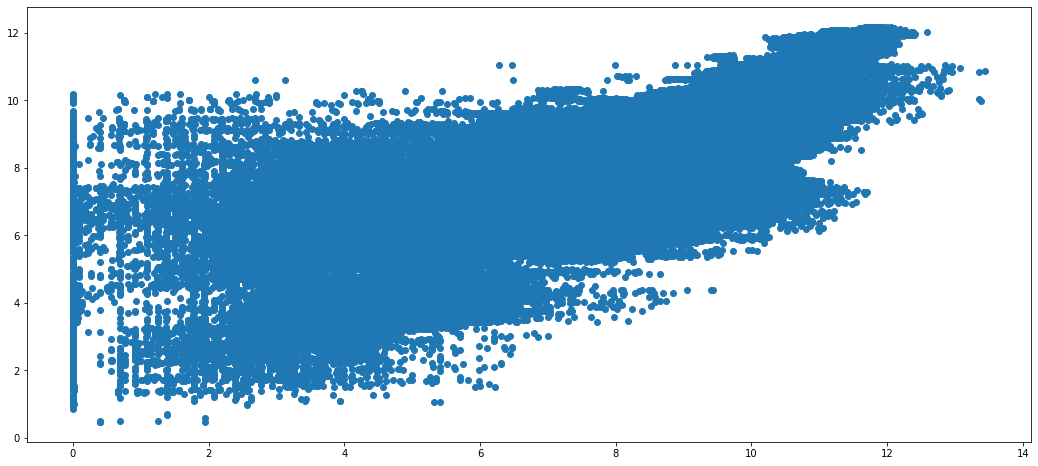

In [151]:
plt.scatter(y_train, y_hat)
 

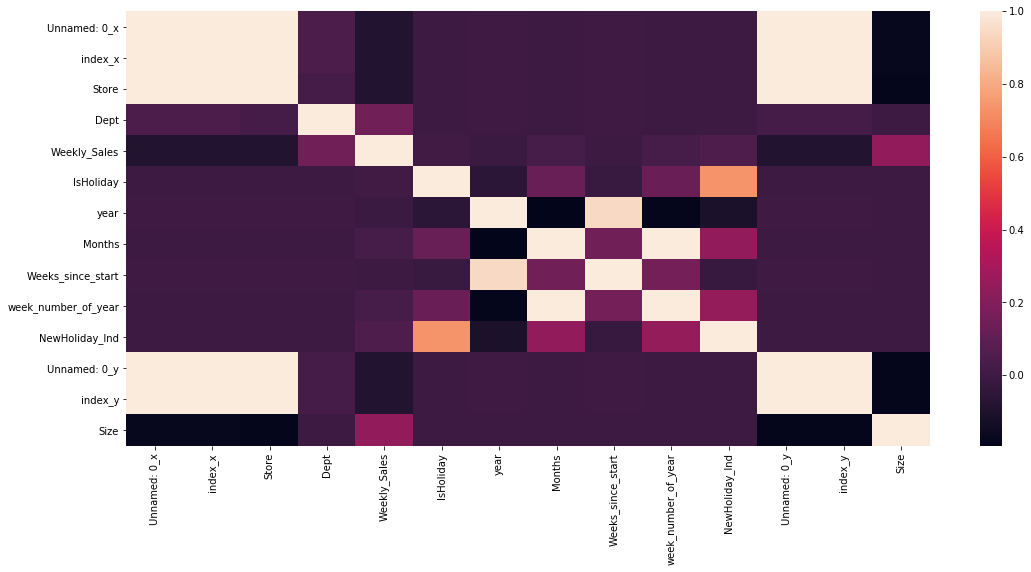

In [152]:
sns.heatmap(merge_training_store.corr(), fmt="d")

In [0]:
# quadratic trend + add seaonality
train_Xt['Months'] = temp_dataset['Months']



In [0]:
months_dummies = pd.get_dummies(train_Xt['Months'], prefix= "Month #:")
train_Xt = pd.concat([train_Xt, months_dummies], axis = 1)


In [155]:
train_Xt.describe()

train_Xt.drop([['Months']], axis = 1)

KeyError: ignored

In [156]:

#train_y = np.log1p(train_y + 1)
#train_Xt['PrevWeekSales'] = np.log1p(train_Xt['PrevWeekSales'])
X_train, X_test, y_train, y_test = train_test_split(train_Xt, train_y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

res_train = y_train - y_hat

y_hat_test = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
res_test = y_test - y_hat_test


mse = mean_squared_error(y_train, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)



0.6775245611983445
0.6773254124756142
Root_Mean_Squared_Error : 1.1773627367391788


In [157]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_hat, y_train)

1.386183013861969

In [0]:
# remove seasonality by difference
train_Xt['PrevWeekSales'] = temp_dataset['Weekly_Sales'].shift(1)






In [0]:
train_y.corr(train_Xt['PrevWeekSales'])

0.9451388433347493

In [0]:
train_Xt['PrevWeekSales']= np.where(train_Xt['Weeks_since_start'] == 0, 0, train_Xt['PrevWeekSales'])



In [160]:
#train_y = np.log1p(train_y + 1)
train_Xt['PrevWeekSales'] = np.log1p(train_Xt['PrevWeekSales'])

X_train, X_test, y_train, y_test = train_test_split(train_Xt, train_y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

res_train = y_train - y_hat

y_hat_test = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
res_test = y_test - y_hat_test
print(mean_squared_error(y_hat, y_train))
print(mean_squared_error(y_hat_test, y_test))

mse = mean_squared_error(y_train, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)



0.8745747216138225
0.8761278167959213
0.5391492482463603
0.5355166237269684
Root_Mean_Squared_Error : 0.7342678314119176


In [0]:
# don't run again

#train_y = np.log1p(train_y + 1)
#train_Xt['PrevWeekSales'] = np.log1p(train_Xt['PrevWeekSales'])

X_train, X_test, y_train, y_test = train_test_split(train_Xt, train_y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

res_train = y_train - y_hat

y_hat_test = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
res_test = y_test - y_hat_test
print(mean_squared_error(y_hat, y_train))
print(mean_squared_error(y_hat_test, y_test))

mse = mean_squared_error(y_train, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)

0.792811868817968
0.794977124324544
6.693687040866661e-05
6.698443468751612e-05
Root_Mean_Squared_Error : 0.008181495609524374


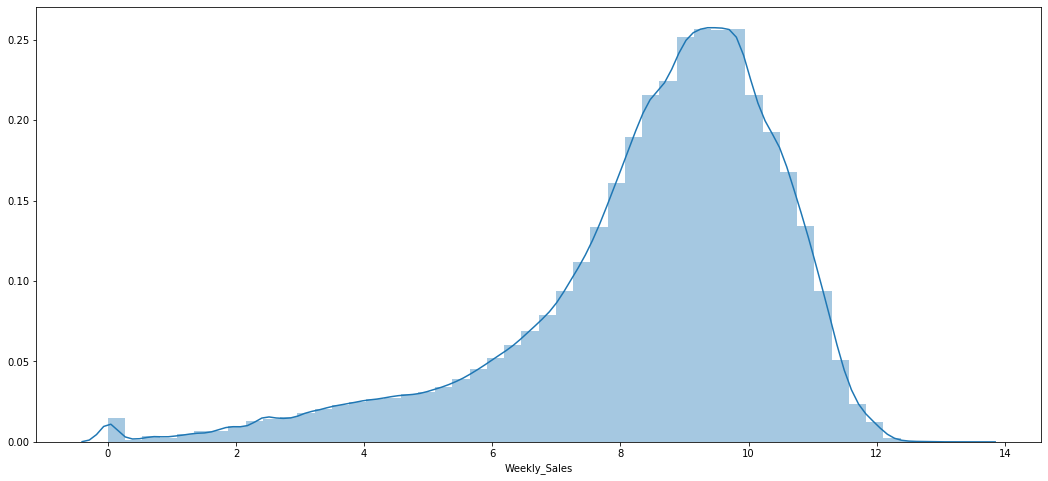

In [164]:
sns.distplot(train_y)

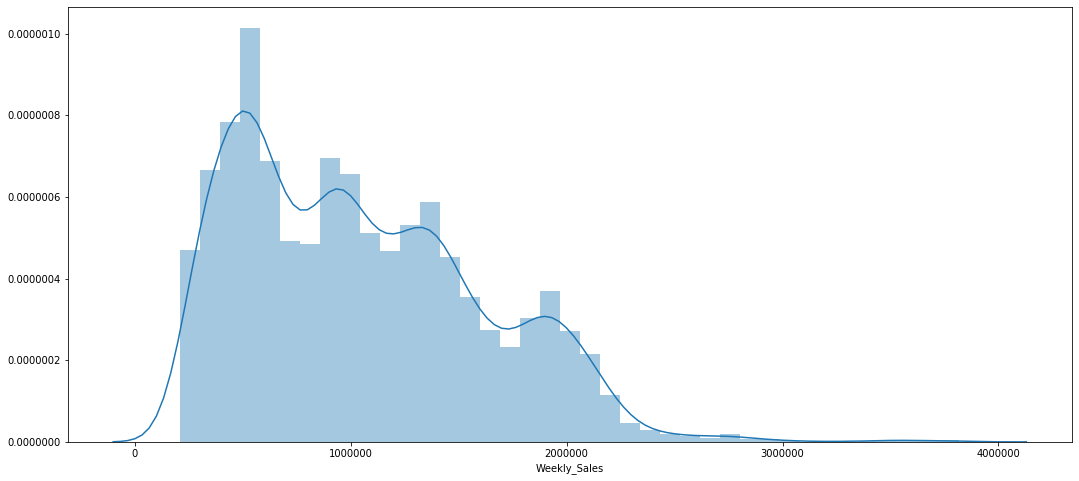

In [165]:
sns.distplot(merge2['Weekly_Sales'])

# New Section

In [0]:
class KNNRegressor():
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon = 1e-3):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X - X[i])**2, axis = 1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+ epsilon)
            y_hat[i] = gamma_k.dot(self.y[idxt])
            
        return y_hat

    def accuracy(self, y_hat=None, y=None):

        y_pred = y_hat
        score = np.mean(1 - (((y - y_pred)**2).sum(axis=1) / ((y - y.mean(axis=1))**2).sum(axis=1)))
    
        return score


In [0]:
from sklearn import neighbors

n_neighbors = 5
# Fit regression model
n_neighbors = 5

    

X_train, X_test, y_train, y_test = train_test_split(train_Xt, train_y, test_size = 0.2, random_state = 0)

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_hat = knn.fit(X_train, y_train).predict(X_test)
    y_hat_newdata = knn.fit(X_train, y_train).predict()
    #regressor = KNNRegressor()
    #regressor.fit(X_train, y_train)
    #y_hat = regressor.predict(X_train)

print(regressor.score(X_train, y_train))

res_train = y_train - y_hat

y_hat_test = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
res_test = y_test - y_hat_test
print(mean_squared_error(y_hat, y_train))
print(mean_squared_error(y_hat_test, y_test))

mse = mean_squared_error(y_train, y_hat)
from math import sqrt
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)




In [0]:
train_Xt.head()

,Weeks_since_start,Type:_A,Type:_B,Type:_C,Store#:_1,Store#:_2,Store#:_3,Store#:_4,Store#:_5,Store#:_6,Store#:_7,Store#:_8,Store#:_9,Store#:_10,Store#:_11,Store#:_12,Store#:_13,Store#:_14,Store#:_15,Store#:_16,Store#:_17,Store#:_18,Store#:_19,Store#:_20,Store#:_21,Store#:_22,Store#:_23,Store#:_24,Store#:_25,Store#:_26,Store#:_27,Store#:_28,Store#:_29,Store#:_30,Store#:_31,Store#:_32,Store#:_33,Store#:_34,Store#:_35,Store#:_36,...,Dept#:_60,Dept#:_65,Dept#:_67,Dept#:_71,Dept#:_72,Dept#:_74,Dept#:_77,Dept#:_78,Dept#:_79,Dept#:_80,Dept#:_81,Dept#:_82,Dept#:_83,Dept#:_85,Dept#:_87,Dept#:_90,Dept#:_91,Dept#:_92,Dept#:_93,Dept#:_94,Dept#:_95,Dept#:_96,Dept#:_97,Dept#:_98,Dept#:_99,WeekSquare_since_start,Months,Month #:_1,Month #:_2,Month #:_3,Month #:_4,Month #:_5,Month #:_6,Month #:_7,Month #:_8,Month #:_9,Month #:_10,Month #:_11,Month #:_12,PrevWeekSales
0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0.00
1,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0,24924.50
2,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,2,0,1,0,0,0,0,0,0,0,0,0,0,46039.49
3,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,2,0,1,0,0,0,0,0,0,0,0,0,0,41595.55
4,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,3,0,0,1,0,0,0,0,0,0,0,0,0,19403.54


Text(0, 0.5, 'Actual Weekly Sales')

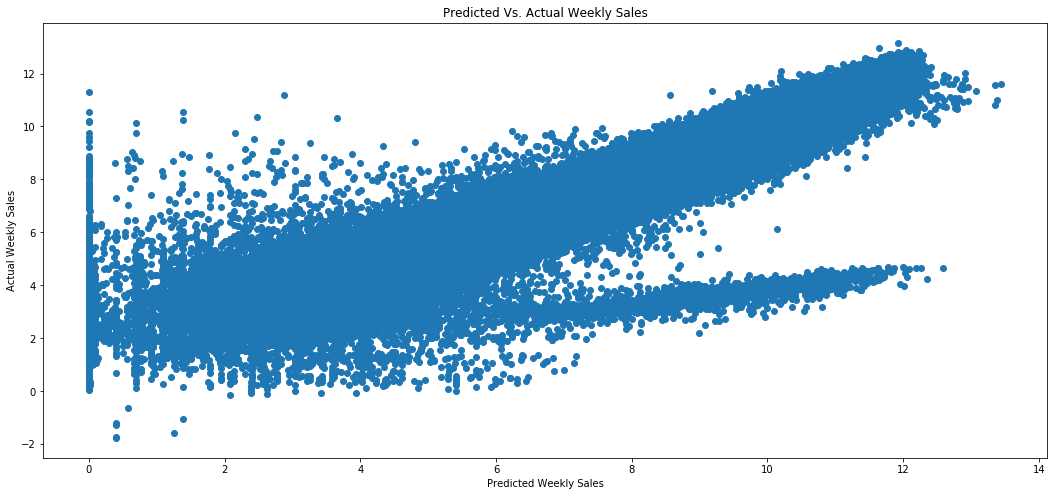

In [161]:
plt.scatter(y_train, y_hat)
plt.title('Predicted Vs. Actual Weekly Sales')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Actual Weekly Sales')

 

In [0]:
plt.plot(WeeklySales_Store['Date'], np.log(WeeklySales_Store['Weekly_Sales']))

In [0]:
plt.plot(WeeklySales_Store['Date'], WeeklySales_Store['WeekSales_Change'])

In [0]:
sns.distplot(WeeklySales_Store['Weekly_Sales'])

In [0]:
sns.distplot(WeeklySales_Store['WeekSales_Change'])

In [0]:

def stationarity_test(dataset,number):
  data = dataset.copy()
  data = data.iloc[: len(data)-number] #不检测最后number个数据
  #平稳性检测
  from statsmodels.tsa.stattools import adfuller as ADF
  diff = 0
  adf = ADF(data['WeekSales'])
  while adf[1] > 0.05:
    diff = diff + 1
    adf = ADF(data['Weekly_Sales'].diff(diff).dropna())
  print(u'原始序列经过%s阶差分后归于平稳，p值为%s' %(diff, adf[1]))
  

In [0]:
WeeklySales_Store.head()

In [0]:
stationarity_test(WeeklySales_Store,1)

In [0]:
def whitenoise_test(dataset,number):
  data = dataset.copy()
  data = data.iloc[: len(data)-number] #不使用最后5个数据
#白噪声检测
  from statsmodels.stats.diagnostic import acorr_ljungbox
  [[lb], [p]] = acorr_ljungbox(data['Weekly_Sales'], lags = 1)
  if p < 0.05:
    print(u'原始序列为非白噪声序列，对应的p值为：%s' %p)
  else:
    print(u'原始该序列为白噪声序列，对应的p值为：%s' %p)
  [[lb], [p]] = acorr_ljungbox(data['Weekly_Sales'].diff().dropna(), lags = 1)
  if p < 0.05:
    print(u'一阶差分序列为非白噪声序列，对应的p值为：%s' %p)
  else:
    print(u'一阶差分该序列为白噪声序列，对应的p值为：%s' %p)


## Our winner is Multivariate Linear Regressor with R square around 90%.